In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 

In [2]:
#Data retrieved from Lahman Database
batting = pd.read_csv('Labor Data\Batting.csv')
batting.head()
batting = batting.dropna()
batting.head()

batting = batting.drop(columns=['stint'])
batting.head()

,playerID,yearID,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
12629,aitchra01,1911,BRO,NL,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12700,camniha01,1911,SLN,NL,2,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12738,cottren01,1911,PIT,NL,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12830,griffha01,1911,CHN,NL,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
13045,pucketr01,1911,PHI,NL,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
salaries = pd.read_csv('Labor Data\Salaries.csv')
salaries.head()
salaries = salaries.dropna()
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
salaries = salaries.drop(columns=["teamID", "lgID"])

In [5]:
zimmerman = salaries[salaries['playerID'] == 'zimmery01']
zimmerman

,yearID,playerID,salary
18112,2006,zimmery01,327000
19810,2008,zimmery01,465000
20623,2009,zimmery01,3325000
21453,2010,zimmery01,6350000
22292,2011,zimmery01,9025000
23140,2012,zimmery01,12000000
23955,2013,zimmery01,14100000
24757,2014,zimmery01,14000000
25574,2015,zimmery01,14000000
26427,2016,zimmery01,14000000


In [21]:
fielding = pd.read_csv('Labor Data\Fielding.csv')
fielding.head()
fielding = fielding.fillna(0)
fielding.head()

#Having Catcher stats might skew data for other positions
fielding=fielding.drop(columns=["teamID", "lgID", 'stint', 'PB', 'WP','SB', 'CS', 'ZR', 'G'])
#Only salary data after 1983
fielding=fielding[fielding['yearID']>= 1985]
#Only want hitters in this data set
fielding=fielding[fielding['POS']!= 'P']
#Position should be irrelevant
fielding=fielding.drop(columns=['POS'])
#Getting total statistics from that year regarless of the position 
fielding=fielding.groupby(['playerID', 'yearID'])
fielding=fielding.sum()

fielding.head()

GS  InnOuts   PO  A    E  DP
playerID  yearID                                
abadan01  2001     0.0      3.0    2  0  0.0   1
          2003     4.0    135.0   35  1  1.0   2
abbotje01 1997     4.0    140.0   15  0  0.0   0
          1998    61.0   1526.0  132  0  4.0   0
          1999    17.0    408.0   25  0  1.0   0

In [28]:
#Looking at Ryan Zimmerman Stats
zimmermanf =  fielding.loc['zimmery01']
zimmermanf

,GS,InnOuts,PO,A,E,DP
yearID,,,,,,
2005,12.0,360.0,9,30,2.0,5
2006,157.0,4105.0,152,260,15.0,30
2007,161.0,4295.0,140,348,23.0,39
2008,104.0,2732.0,95,199,10.0,25
2009,153.0,4013.0,117,325,17.0,28
2010,137.0,3571.0,85,242,17.0,23
2011,97.0,2600.0,66,200,12.0,19
2012,144.0,3841.0,76,284,19.0,28
2013,141.0,3737.0,98,260,21.0,28


In [23]:
hitters = pd.merge(fielding, batting, on=["playerID", "yearID"])
hitters.head()

,playerID,yearID,GS,InnOuts,PO,A,E,DP,teamID,lgID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abadan01,2001,0.0,3.0,2,0,0.0,1,OAK,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,abadan01,2003,4.0,135.0,35,1,1.0,2,BOS,AL,...,0.0,0.0,1.0,2,5.0,0.0,0.0,0.0,0.0,1.0
2,abbotje01,1997,4.0,140.0,15,0,0.0,0,CHA,AL,...,2.0,0.0,0.0,0,6.0,0.0,0.0,0.0,0.0,3.0
3,abbotje01,1998,61.0,1526.0,132,0,4.0,0,CHA,AL,...,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0
4,abbotje01,1999,17.0,408.0,25,0,1.0,0,CHA,AL,...,6.0,1.0,1.0,5,12.0,0.0,0.0,1.0,1.0,4.0


In [24]:
hitters = pd.merge(salaries, hitters, on=["playerID", "yearID"])
hitters.head()

,yearID,playerID,salary,GS,InnOuts,PO,A,E,DP,teamID,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,benedbr01,545000,67.0,1698.0,314,35,4.0,1,ATL,...,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1985,ceronri01,625000,76.0,2097.0,384,48,6.0,4,ATL,...,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1985,chambch01,800000,27.0,814.0,299,25,1.0,31,ATL,...,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,1985,harpete01,250000,124.0,3299.0,215,10,5.0,0,ATL,...,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,1985,hornebo01,1500000,125.0,3196.0,917,119,11.0,111,ATL,...,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0


In [25]:
hitters.describe()
hitters.columns

Index(['yearID', 'playerID', 'salary', 'GS', 'InnOuts', 'PO', 'A', 'E', 'DP',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [11]:
hitters.to_excel("hitters_final.xlsx") 
hitters.to_csv("hitters_final.csv", index='false')

In [12]:
zimmerman = hitters[hitters['playerID'] == 'zimmery01']
zimmerman

,yearID,playerID,salary,POS,GS,InnOuts,PO,A,E,DP,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
30548,2006,zimmery01,327000,3B,157.0,4105.0,152,260,15.0,30,...,110.0,11.0,8.0,61,120.0,7.0,2.0,1.0,4.0,15.0
33340,2008,zimmery01,465000,3B,104.0,2732.0,95,199,10.0,25,...,51.0,1.0,1.0,31,71.0,1.0,3.0,0.0,4.0,12.0
34703,2009,zimmery01,3325000,3B,153.0,4013.0,117,325,17.0,28,...,106.0,2.0,0.0,72,119.0,9.0,2.0,0.0,9.0,22.0
36091,2010,zimmery01,6350000,3B,137.0,3571.0,85,242,17.0,23,...,85.0,4.0,1.0,69,98.0,6.0,4.0,0.0,5.0,16.0
37436,2011,zimmery01,9025000,3B,97.0,2600.0,66,200,12.0,19,...,49.0,3.0,1.0,41,73.0,4.0,1.0,0.0,3.0,14.0
38919,2012,zimmery01,12000000,3B,144.0,3841.0,76,284,19.0,28,...,95.0,5.0,2.0,57,116.0,8.0,2.0,0.0,4.0,20.0
40348,2013,zimmery01,14100000,3B,141.0,3737.0,98,260,21.0,28,...,79.0,6.0,0.0,60,133.0,2.0,2.0,0.0,3.0,16.0
41760,2014,zimmery01,14000000,1B,1.0,54.0,23,0,1.0,2,...,38.0,0.0,0.0,22,37.0,0.0,0.0,0.0,4.0,6.0
41761,2014,zimmery01,14000000,3B,23.0,553.0,18,37,3.0,4,...,38.0,0.0,0.0,22,37.0,0.0,0.0,0.0,4.0,6.0
41762,2014,zimmery01,14000000,OF,30.0,797.0,48,2,0.0,0,...,38.0,0.0,0.0,22,37.0,0.0,0.0,0.0,4.0,6.0


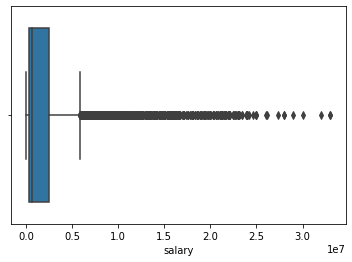

In [31]:
sns.boxplot(x=hitters["salary"]);